In [2]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import numpy as np

In [3]:
df = pd.read_csv("../datasets/students_simple.csv")

In [4]:
N = 14
n1 = N % 5
n2 = (N ** 2) % 5 + 5
n1, n2

(4, 6)

In [5]:
x, y = df.iloc[:, n1], df.iloc[:, n2]

In [6]:
x.head()

0    24
1    32
2    24
3    24
4    60
Name: pages, dtype: int64

In [7]:
y.head()

0    3.533
1    2.623
2    2.875
3    3.375
4    3.000
Name: bmi, dtype: float64

In [8]:
xm, ym = x.mean(), y.mean()

x_sign = np.sign(x - xm)
y_sign = np.sign(y - ym)

In [9]:
C = (x_sign == y_sign).sum()
H = (x_sign != y_sign).sum()

In [10]:
fechner_corr = (C - H) / (C + H)
fechner_corr

np.float64(-0.4)

In [11]:
xc, yc = x - xm, y - ym

In [12]:
pearson = np.sum(xc * yc) / np.sqrt(np.sum(xc**2) * np.sum(yc**2))
pearson

np.float64(-0.17949732800721208)

In [13]:
def pearson_ci(r, n):
    z_prime = np.arctanh(r)
    se_z_prime = 1 / np.sqrt(n - 3)

    z_critical = 1.96

    z_lower = z_prime - z_critical * se_z_prime
    z_upper = z_prime + z_critical * se_z_prime

    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)

    return (r_lower, r_upper)

In [14]:
n = len(x)
pearson_ci(pearson, n)

(np.float64(-0.5762519663919208), np.float64(0.28572646267855223))

In [15]:
from scipy.stats import rankdata

x_rank = rankdata(x)
y_rank = rankdata(y)

In [16]:
x_rank

array([ 5. ,  9. ,  5. ,  5. , 16.5,  1.5, 19.5,  5. , 13. ,  5. ,  1.5,
       13. ,  9. , 13. , 18. , 13. , 19.5, 13. ,  9. , 16.5])

In [17]:
spirmen = 1 - ((x_rank - y_rank)**2).sum() / (n * (n**2 - 1))
spirmen

np.float64(0.7833333333333333)

In [18]:
concordant = 0
discordant = 0
x_ties = 0
y_ties = 0

for i in range(n):
    for j in range(i + 1, n):
        x_diff = x_rank[i] - x_rank[j]
        y_diff = y_rank[i] - y_rank[j]

        product = x_diff * y_diff

        if product > 0:
            concordant += 1
        elif product < 0:
            discordant += 1
        else:
            if x_diff == 0:
                x_ties += 1
            if y_diff == 0:
                y_ties += 1

total_pairs = n * (n - 1) // 2
numerator = concordant - discordant
denominator = np.sqrt((total_pairs - x_ties) * (total_pairs - y_ties))

kendall = numerator / denominator
kendall

np.float64(-0.24423934661177393)

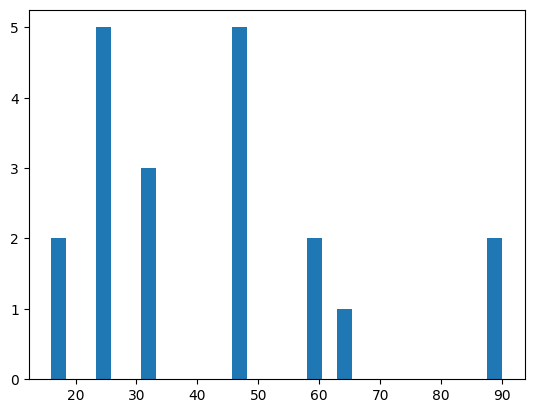

In [19]:
plt.hist(x, bins=30)
plt.show()

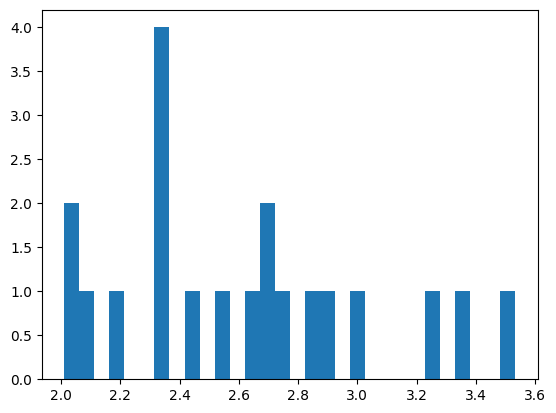

In [20]:
plt.hist(y, bins=30)
plt.show()

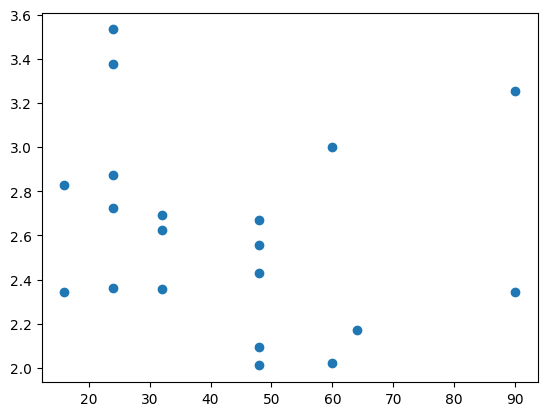

In [21]:
plt.scatter(x, y)
plt.show()

In [24]:
a = np.cov(x, y)[0, 1] / np.var(x)
b = np.mean(y) - a * np.mean(x)

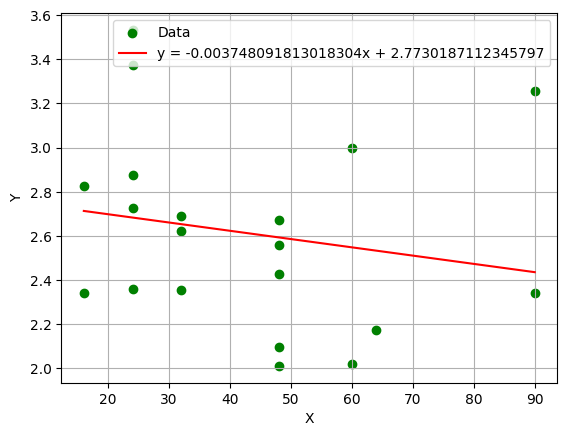

In [27]:
plt.scatter(x, y, color='green', label='Data')

x_line = np.linspace(min(x), max(x), 100)
y_line = a * x_line + b

plt.plot(x_line, y_line, color='red', label=f'y = {a}x + {b}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
X = np.column_stack([np.ones(n), x, x**2])
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([ 3.45176411e+00, -3.71289611e-02,  3.26859996e-04])

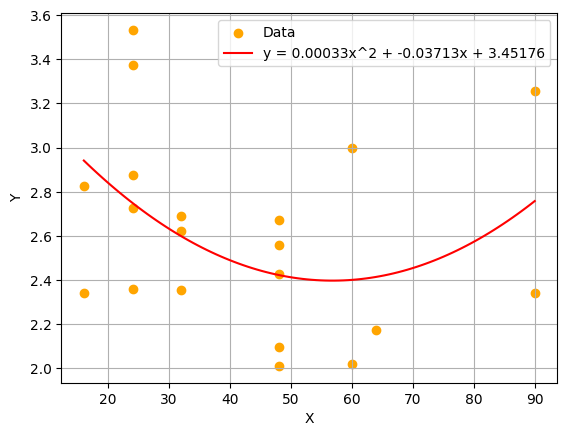

In [57]:
plt.scatter(x, y, color='orange', label='Data')

x_line = np.linspace(min(x), max(x), 100)
y_line = beta[2] * x_line**2 + beta[1] * x_line + beta[0]

plt.plot(x_line, y_line, color='red', label=f'y = {beta[2]:.5f}x^2 + {beta[1]:.5f}x + {beta[0]:.5f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
X = np.column_stack([np.ones(n), 1/x])
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([2.39223785, 7.3406685 ])

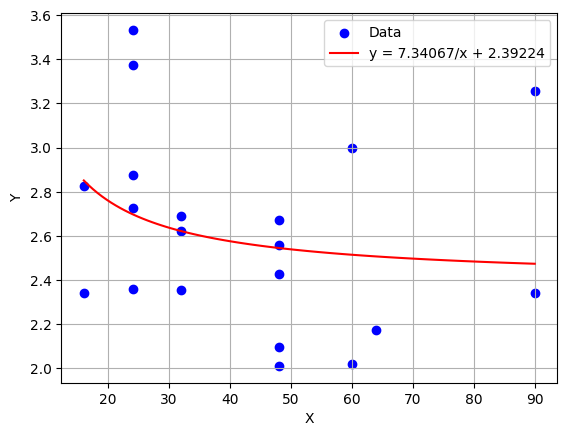

In [76]:
plt.scatter(x, y, color='blue', label='Data')

x_line = np.linspace(min(x), max(x), 100)
y_line = (beta[1] / x_line) + beta[0]

plt.plot(x_line, y_line, color='red', label=f'y = {beta[1]:.5f}/x + {beta[0]:.5f}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [71]:
X = np.column_stack([np.ones(n), x])
beta = np.linalg.inv(X.T @ X) @ X.T @ np.log(y)
beta

array([ 1.00937791, -0.0014456 ])

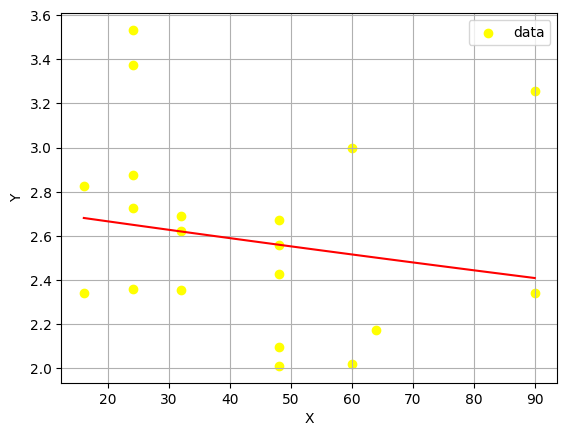

In [72]:
plt.scatter(x, y, color='yellow', label='data')

x_line = np.linspace(min(x), max(x), 100)
y_line = np.exp((beta[1] * x_line) + beta[0])

plt.plot(x_line, y_line, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
from scipy.stats import fisher_exact

fisher_exact([a * x + b, y])

SignificanceResult(statistic=np.float64(1.846207238682829e-08), pvalue=np.float64(1.0))

In [78]:
from scipy.stats import fisher_exact

fisher_exact([(beta[1] / x) + beta[0], y])

SignificanceResult(statistic=np.float64(1.846207238682829e-08), pvalue=np.float64(1.0))